**Übungsaufgabe**

Im Jahr 1610 entdeckte Galileo mit seinem Teleskop
um Jupiter vier größere Monde. Ihre mittleren Bahnradien $a$
und Umlaufzeiten $T$ sind:

| Mond | a=Abstand zu Jupiter (in 10^8 m) | T=Umlaufzeit (in Tagen) |
|---|---|---|
|Io | 4,22 | 1,77 |
|Europa | 6,71 | 3,55 |
|Ganymed | 10,7 | 7,16 |
|Callisto | 18,8 | 16,7 |

**a)** Tragen Sie die Werte aus dieser Tabelle doppel-logarithmisch auf. Da es mathematisch nicht korrekt ist, aus Zeiten oder Distanzen den Logarithmus zu ziehen, empfiehlt es sich, diese Werte zunächst auf entsprechende Referenzparameter zu normieren, z.B. auf den Radius der Bahn der Erde um die Sonne ($a_{Erde} = 1,5\cdot 10^{11}$ m) und deren Umlaufzeit ($T_{Erde} = 365,25$ Tage).
Tragen Sie also $\ln(T/T_{Erde})$ (y-Achse) gegen $\ln(a/a_{Erde})$ (x-Achse), und
zeigen Sie, dass sich die Punkte auf einer Geraden befinden. 

**b)** Bestimmen Sie die Steigung dieser Geraden und vergleichen
Sie die Steigung mit dem Wert, den Sie aus dem dritten
keplerschen Gesetz $G M T^2 = 4 \pi^2 r^3$ für ein kleines Objekt, welches im Abstand $r$ um deutlich größeres Objekt der Masse $M$ rotiert, erwarten würden. 

**c)** Berechnen Sie die Masse von Jupiter aus dem Schnittpunkt dieser Linie mit der
y-Achse und dem Wissen, dass die Masse der Sonne $M_{Sonne} = 1.99 \cdot 10^{30}$ kg ist. (Literaturwert: $M_{Jupiter} = 1.9 \cdot 10^{27}$ kg).

In [2]:
# Am Anfang müssen wir ein paar Bibliotheken laden, um alle Funktionen, die wir verwenden möchten, parat zu haben.
from math import *
from numpy import *
from matplotlib.pyplot import *

**a)** Die erste Aufgabe ist einfach eine Darstellung der gegebenen Daten. Wie wir aus dem unten gezeigten Diagramm entnehmen können, liegen diese Daten tatsächlich auf einer Geraden.

ln(a):  [-5.87338526 -5.40962144 -4.94297665 -4.37936352]
ln(T):  [-5.3296025  -4.63363445 -3.93207207 -3.08517333]


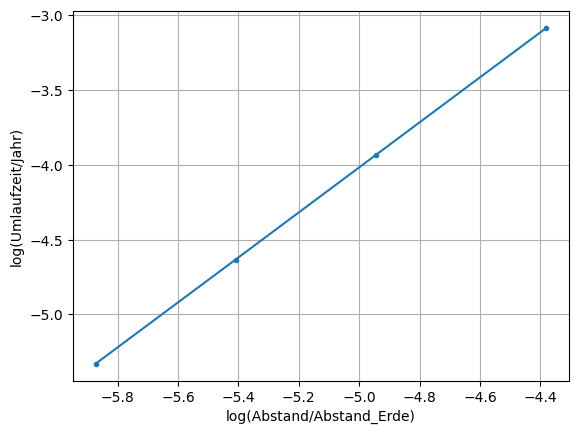

In [5]:
a = 1e8*array([4.22, 6.71, 10.7, 18.8]) # in m
T = array([1.77, 3.55, 7.16, 16.7]) # in Tagen
aErde = 1.5e11 # in m
TErde = 365.25 # ein Jahr in Tagen

# Nun stellen wir diese Beziehung logarithmisch dar (Beachte: log = Natürlicher Logarithmus).
plot(log(a/aErde),log(T/TErde),'.-') 
grid('on')
xlabel('log(Abstand/Abstand_Erde)')
ylabel('log(Umlaufzeit/Jahr)')
print("ln(a): ",log(a/aErde))
print("ln(T): ",log(T/TErde))

**b)** In dem obigen Diagramm ist der Zusammenhang zwischen dem Logarithmus aus Abstand und Umlaufzeit linear. Die Steigung dieser geraden sollte genau dem Verhältnis der Potenzen entsprechen, mit denen die beiden Größen eingehen. Wir können diese Parameter nun an die Gerade ln(T/TErde) = Offset + Steigung*ln(a/aErde) anfitten:

Steigung =  1.502393909108254
Offset =  3.4942163156265345


C:\Users\chris\AppData\Local\Temp\ipykernel_30396\2891939075.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Steigung, Offset = linalg.lstsq(vstack([log(a/aErde), np.ones(len(a))]).T, log(T/TErde))[0]


Text(0, 0.5, 'log(Umlaufzeit/Jahr)')

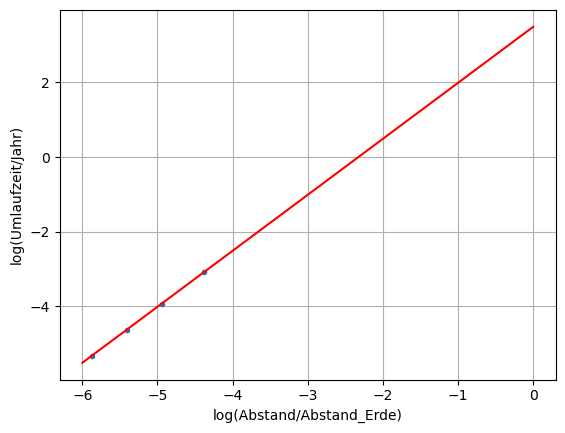

In [8]:
# Hier fitten wir die lineare Gleichung ln(Umlaufzeit) = Offset + Steigung*ln(Abstand)
# Die verwendete Routine berechnet einen 'least-squares fit', 
# d.h. sie minimiert die Summe der quadratischen Abweichungen zwischen Messwert und Kurve.
# Bei einer linearen Gleichung wie dieser heißt das auch 'lineare Regression'
Steigung, Offset = linalg.lstsq(vstack([log(a/aErde), np.ones(len(a))]).T, log(T/TErde))[0]
print("Steigung = ",Steigung)
print("Offset = ",Offset)

# Wir wollen auch die angefittete gerade und ihren Schnittpunkt mit der y-Achse darstellen:
plot(log(a/aErde),log(T/TErde),'.') 
plot(array([-6.0, 0.0]),Offset+Steigung*array([-6.0, 0.0]),'r-') 
grid('on')
xlabel('log(Abstand/Abstand_Erde)')
ylabel('log(Umlaufzeit/Jahr)')

Die Steigung dieser Gerade entspricht genau dem Verhältnis der Potenzen 3/2 = 1.5. Der Offset entspricht dem Schnittpunkt der Geraden mit der y-Achse.
Diese Koeffizienten können wir aus dem 3. Keplerschen Gesetz ableiten:
$$ G M_{Jupiter} T^2 = 4 \pi^2 a^3$$
$$ \Rightarrow M_{Jupiter} \frac{T^2}{a^3} = \frac{4 \pi^2}{G}$$
Die selbe Beziehung lässt sich auch für die Bewegung der Erde um die Sonne aufschreiben:
$$ \Rightarrow M_{Sonne} \frac{T_{Erde}^2}{a_{Erde}^3} = \frac{4 \pi^2}{G}$$
Da die Terme auf den rechten Seiten der beiden obigen Gleichungen identisch sind, müssen auch die beiden linken Seiten identisch sein:
$$ M_{Jupiter} \frac{T^2}{a^3} = M_{Sonne} \frac{T_{Erde}^2}{a_{Erde}^3}$$
$$ \Rightarrow \frac{M_{Jupiter}}{M_{Sonne}} \left(\frac{T}{T_{Erde}}\right)^2 = \left(\frac{a}{a_{Erde}}\right)^3$$
$$ \Rightarrow \ln\left(\frac{M_{Jupiter}}{M_{Sonne}}\right) +  2 \ln\left(\frac{T}{T_{Erde}}\right) = 3\ln \left(\frac{a}{a_{Erde}}\right)$$
$$ \Rightarrow  \ln\left(\frac{T}{T_{Erde}}\right) = -\frac{1}{2}\ln\left(\frac{M_{Jupiter}}{M_{Sonne}}\right) + \frac{3}{2}\ln \left(\frac{a}{a_{Erde}}\right)$$


Um die Masse des Jupiters zu bestimmen, müssen wir nun den Schnittpunkt der obigen Gerade mit der y-Achse, d.h. den Offset, auswerten:
$$\textrm{Offset} = -\frac{1}{2}\ln\left(\frac{M_{Jupiter}}{M_{Sonne}}\right) $$
$$\Rightarrow \left(\frac{M_{Jupiter}}{M_{Sonne}}\right) = e^{-2 \textrm{Offset}}  $$
$$\Rightarrow M_{Jupiter} = e^{-2 \textrm{Offset}} M_{Sonne} $$



In [11]:
MSonne = 1.99e30
MJupiter = MSonne*exp(-2*Offset)

print("M_Jupiter = ",MJupiter)

M_Jupiter =  1.8357576534704423e+27


Die so erhaltene Masse für den Jupiter stimmt relativ gut mit dem in der Aufgabe angegebenen Literaturwert überein.